# Creating "Normal" Models 

This notebook will detail how three algorithms—Rolling Mean, ARIMA, and Autoencoder—create "normal" models from my five time series datasets. In other words, this will perform the left half of the following diagram.

<img src="explore/Experiments_Diagram.jpg">



## First let's plots the datasets:

In [25]:
# Standard modules
import os
import sys
import datetime
import pandas as pd
from pandas import datetime
from pandas import read_csv
import numpy as np
from matplotlib import pyplot
import progressbar
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMAResults
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras.layers.advanced_activations import LeakyReLU
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from tensorflow import set_random_seed
#sys.path.append(os.path.abspath('/Users/shawnpolson/Documents/School/Spring 2019/Independent Study/Code/GitHub-Satellite-Telemetry-Anomaly-Detection/Satellite-Telemetry-Anomaly-Detection/Generate_Rolling_Mean_RMSEs.py.py'))

# Custom modules
from Generate_Rolling_Mean_RMSEs import * 
from detect_anomalies_with_rolling_mean import *
from model_with_rolling_mean import *
from correlate import correlation

In [26]:
datasets = ['Data/BusVoltage.csv', 'Data/TotalBusCurrent.csv', 'Data/BatteryTemperature.csv', 'Data/WheelTemperature.csv', 'Data/WheelRPM.csv']
var_names = ['Voltage (V)', 'Current (A)', 'Temperature (C)', 'Temperature (C)', 'RPM']

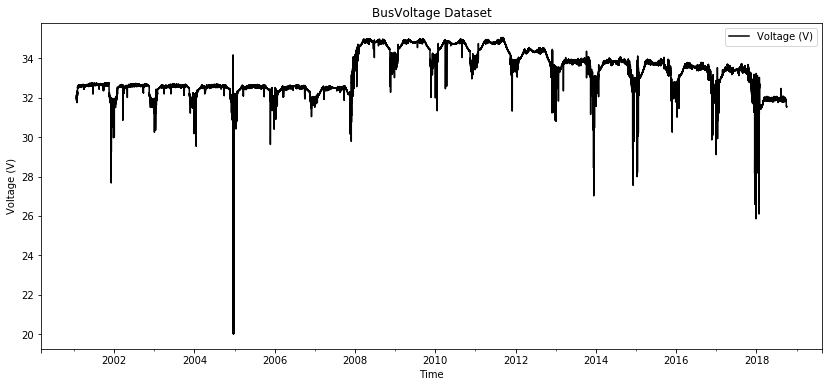

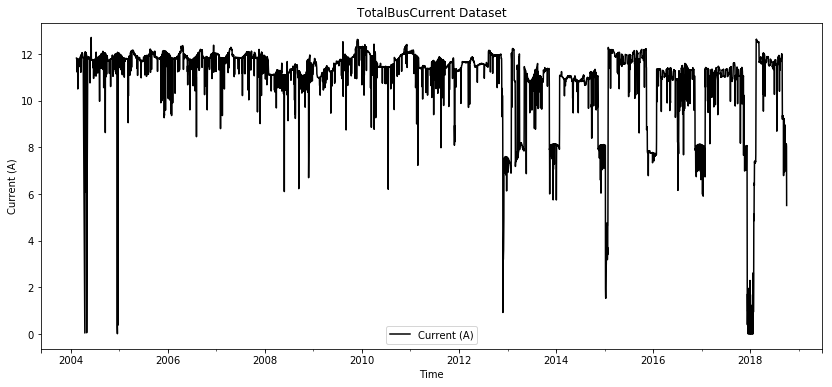

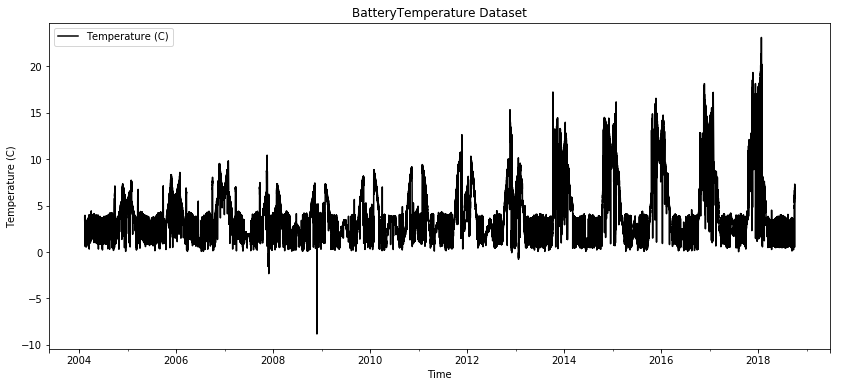

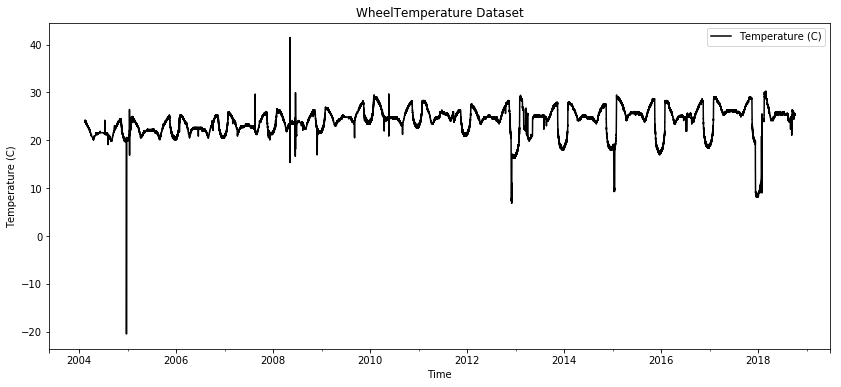

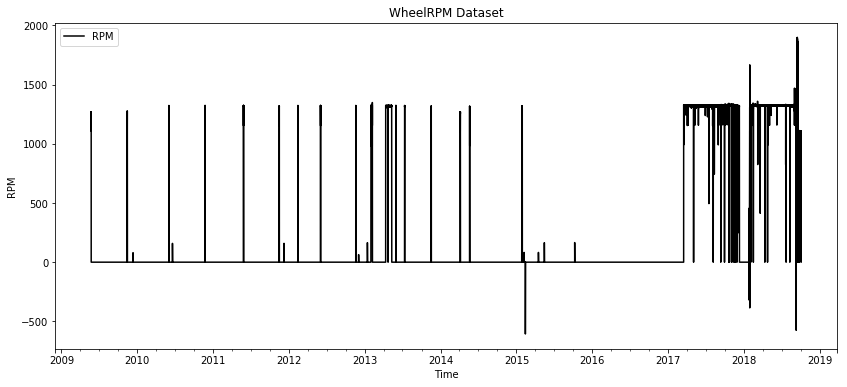

In [27]:
for ds in range(len(datasets)):
    dataset = datasets[ds]
    var_name = var_names[ds]
    ds_name = dataset[5:-4] # drop 'Data/' and '.csv'

    # Load the dataset
    time_series = read_csv(dataset, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
    # Plot the dataset
    ax = time_series.plot(color='black', title=ds_name + ' Dataset', label=var_name, figsize=(14, 6))
    ax.set(xlabel='Time', ylabel=var_name)
    pyplot.legend(loc='best')
    pyplot.show()

## So that's the original data. Next let's create the "normal" models, starting with Rolling Mean:

This rolling mean uses a sliding window of fixed size *L* / 100, where *L* is the length of the dataset.

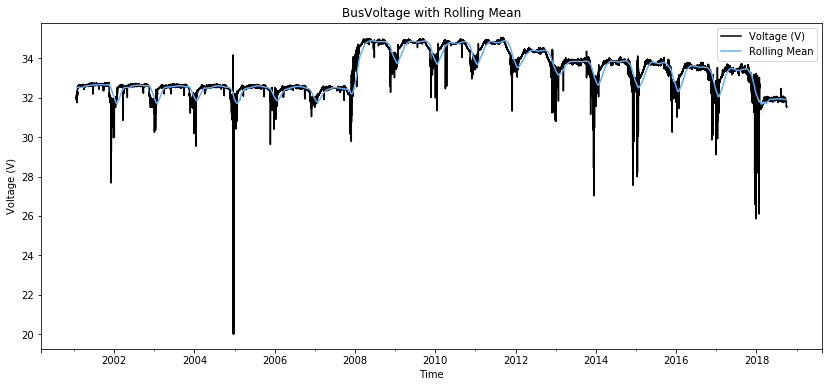

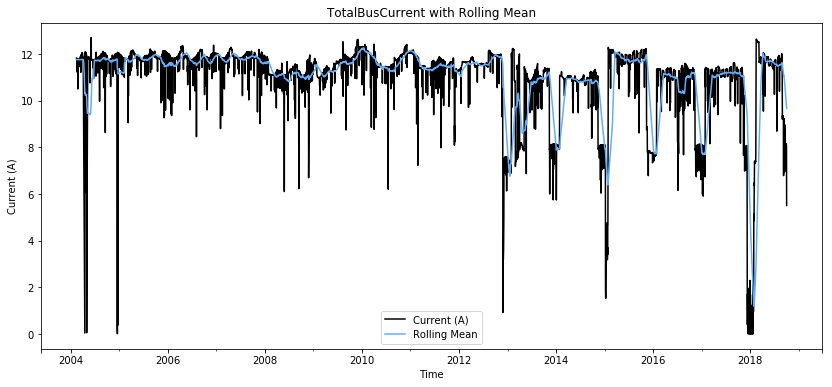

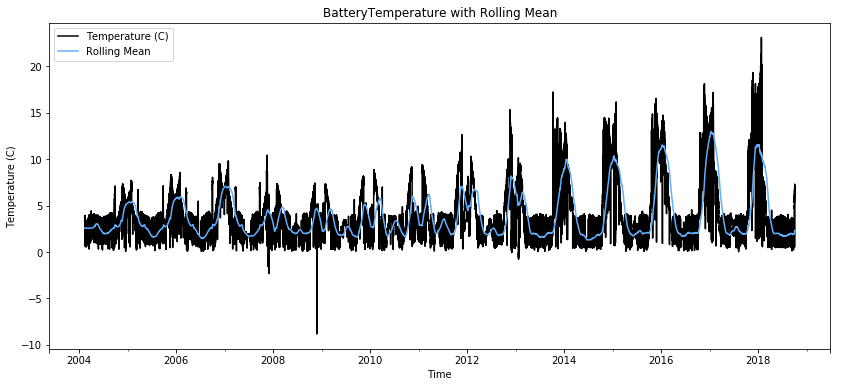

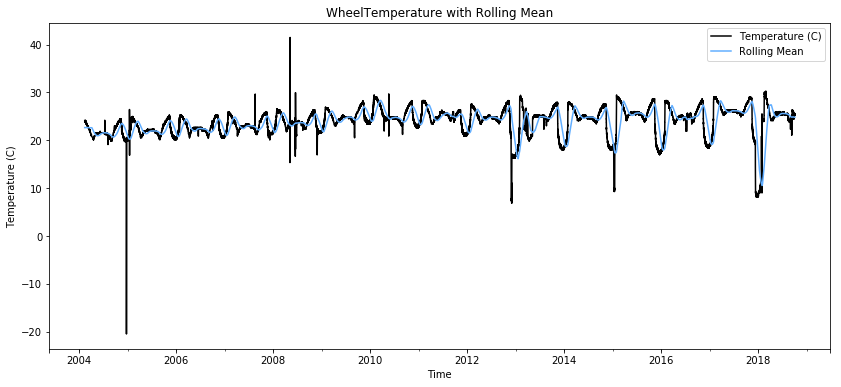

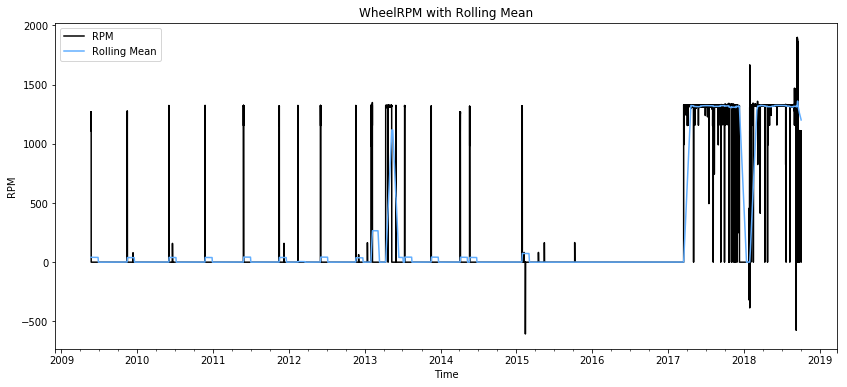

In [28]:
for ds in range(len(datasets)):
    dataset = datasets[ds]
    var_name = var_names[ds]
    ds_name = dataset[5:-4] # drop 'Data/' and '.csv'

    # Load the dataset
    time_series = read_csv(dataset, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
    window_size = int(len(time_series) / 100)
    # Use custom module 'model_with_rolling_mean' which also saves plots and data 
    rolling_mean = model_with_rolling_mean(time_series, window_size, ds_name, var_name=var_name, verbose=True)
    

Now we've stored rolling mean "normal" models. Their CSVs are saved under `./save/datasets/<ds_name>/rolling mean/data/<ds_name>_with_rolling_mean.csv`, where each file is a table with columns [Time, `var_name`, Rolling Mean].

## We can use this saved data to make a table of correlation coefficients:

In [29]:
correlations = pd.DataFrame()

for ds in range(len(datasets)):
    var_name = var_names[ds]
    ds_name = datasets[ds][5:-4] # drop 'Data/' and '.csv'
    
    file_path = 'save/datasets/' + ds_name + '/rolling mean/data/' + ds_name + '_with_rolling_mean.csv'
    # get correlation coefficient between original data and rolling mean
    coeff = correlation(var_name, file_path, 'Rolling Mean', file_path)
    correlations[ds_name] = 0.0  # add a column with this name
    correlations.at['Rolling Mean', ds_name] = coeff  # Make the index "Rolling Mean" if it doesn't exist, place coeff
    
correlations.to_csv('./save/correlations.csv')
print(correlations)

              BusVoltage  TotalBusCurrent  BatteryTemperature  \
Rolling Mean       0.926         0.658593            0.712022   

              WheelTemperature  WheelRPM  
Rolling Mean          0.522871  0.909958  
